<a href="https://colab.research.google.com/github/navindu2004/EcoDispose/blob/main/Salary_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os

# Force unmount Google Drive if it's already mounted
!fusermount -u /content/drive

# Rename the existing 'drive' folder if it exists
if os.path.exists('/content/drive'):
  os.rename('/content/drive', '/content/drive_old')

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

# Specify the 'engine' parameter as 'python' and handle errors with 'on_bad_lines'
df = pd.read_csv('/content/drive/MyDrive/survey_results_public.csv', engine='python', on_bad_lines='skip')

Mounted at /content/drive


Index(['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       ...
       'JobSatPoints_6', 'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9',
       'JobSatPoints_10', 'JobSatPoints_11', 'SurveyLength', 'SurveyEase',
       'ConvertedCompYearly', 'JobSat'],
      dtype='object', length=114)
                  Age           Employment RemoteWork  \
0  Under 18 years old  Employed, full-time     Remote   
1     35-44 years old  Employed, full-time     Remote   
2     45-54 years old  Employed, full-time     Remote   
3     18-24 years old   Student, full-time        NaN   
4     18-24 years old   Student, full-time        NaN   

                                             Country  \
0                           United States of America   
1  United Kingdom of Great Britain and Northern I...   
2  United Kingdom of Great Britain and Northern I...   
3                                           

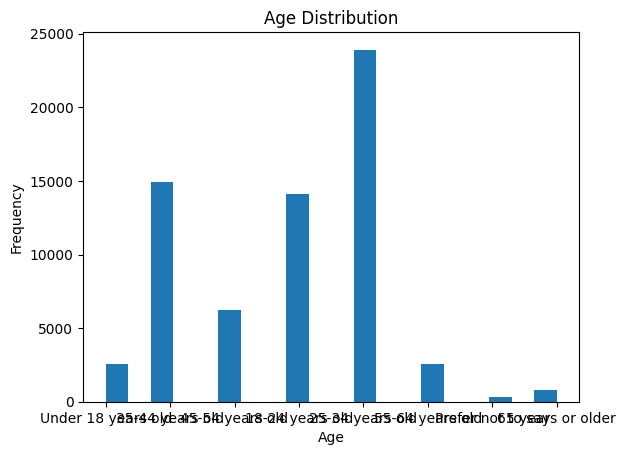

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/survey_results_public.csv')

import matplotlib.pyplot as plt

# Check for the correct column name. It may be 'YearsCodePro'
#  Print all columns to inspect and confirm
print(df.columns)

# Correct the column name in the list if needed
selected_columns = ['Age', 'Employment', 'RemoteWork', 'Country', 'EdLevel', 'CompTotal', 'AISelect', 'YearsCodePro', 'Industry']
df_selected = df[selected_columns]

print(df_selected.head())

plt.hist(df_selected['Age'].dropna(), bins=20)  # Drop NaN values for the histogram
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

In [ ]:
df.isnull().sum()

,0
ResponseId,0
MainBranch,0
Age,0
Employment,0
RemoteWork,10631
...,...
JobSatPoints_11,35992
SurveyLength,9255
SurveyEase,9199
ConvertedCompYearly,42002


ValueError: Maximum allowed size exceeded

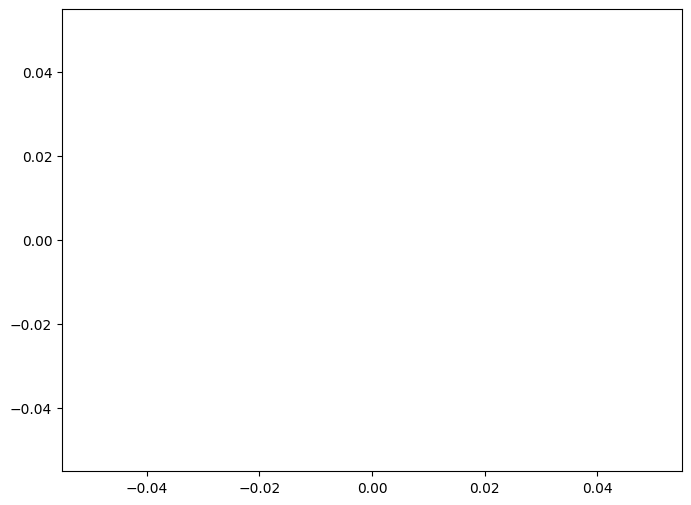

In [ ]:
# prompt: could you create a graph out of the results above ?

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df_selected' is your processed DataFrame

# Example 1: Distribution of 'CompTotal'
plt.figure(figsize=(8, 6))
sns.histplot(df_selected['CompTotal'], kde=True)
plt.title('Distribution of Total Compensation')
plt.xlabel('Compensation')
plt.ylabel('Frequency')
plt.show()

# Example 2: Correlation matrix heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df_selected.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()


# Example 3: Scatter plot of 'YearsCodePro' vs 'CompTotal'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='YearsCodePro', y='CompTotal', data=df_selected)
plt.title('Years of Professional Coding Experience vs. Total Compensation')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Total Compensation')
plt.show()

# Example 4: Box plot of 'CompTotal' by 'EdLevel'
plt.figure(figsize=(10, 6))
sns.boxplot(x='EdLevel', y='CompTotal', data=df_selected)
plt.title('Total Compensation by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Total Compensation')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('CompTotal', axis=1)
Y = df['CompTotal']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print('Comp Total 1', X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

Comp Total 1 (52349, 113) (13088, 113) (52349,) (13088,)


In [1]:
# prompt: initialize and train a linear regression model, and then initialize and train a logistic regression model, initialize and train a SUM model, and then initialize and train a K-nearest neighbour model seperately[

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, accuracy_score # Import necessary metrics
import numpy as np

# Assuming X_train, X_test, Y_train, Y_test are already defined from the previous code

# 1. Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, Y_train)
linear_pred = linear_reg.predict(X_test)
linear_mse = mean_squared_error(Y_test, linear_pred)
print(f"Linear Regression MSE: {linear_mse}")


# 2. Logistic Regression (requires target variable to be categorical)
# Convert 'CompTotal' to categories for logistic regression (example)
Y_cat = pd.cut(Y_train, bins=3, labels=[0,1,2]) # Categorize Y_train into 3 bins
log_reg = LogisticRegression(max_iter=1000) # Increased max_iter to ensure convergence

# Handle potential errors during fitting
try:
  log_reg.fit(X_train, Y_cat)
  log_pred = log_reg.predict(X_test)
  # Convert Y_test to categorical using the same bins and labels from Y_train
  Y_test_cat = pd.cut(Y_test, bins=3, labels=[0, 1, 2], include_lowest=True)

  # Replace NaN values in Y_test_cat with the most frequent value in the series
  Y_test_cat = Y_test_cat.fillna(Y_test_cat.mode()[0])
  log_accuracy = accuracy_score(Y_test_cat, log_pred)
  print(f"Logistic Regression Accuracy: {log_accuracy}")

except ValueError as e:
  print(f"Error during Logistic Regression fitting: {e}")


# 3. SUM Model (not a standard model, so making an assumption)

# Assuming a SUM model means summing all numeric features
def sum_model(x):
  return np.sum(x, axis=1)


sum_train_pred = sum_model(X_train._get_numeric_data())
sum_test_pred = sum_model(X_test._get_numeric_data())

sum_mse = mean_squared_error(Y_test, sum_test_pred)
print(f"Sum Model MSE: {sum_mse}")



# 4. K-Nearest Neighbors Regression

knn_reg = KNeighborsRegressor(n_neighbors=5) # You can adjust the number of neighbors
knn_reg.fit(X_train._get_numeric_data(), Y_train) # Fit only numeric features
knn_pred = knn_reg.predict(X_test._get_numeric_data())
knn_mse = mean_squared_error(Y_test, knn_pred)
print(f"KNN Regression MSE: {knn_mse}")

NameError: name 'X_train' is not defined

<ipython-input-2-7c7edcd0db92>:41: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_selected['Age'].fillna(df_selected['Age'].median(), inplace=True)  # Replace NaN with median
<ipython-input-2-7c7edcd0db92>:56: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 

Missing values per column after cleaning:
Age             0
Employment      0
RemoteWork      0
Country         0
EdLevel         0
CompTotal       0
AISelect        0
YearsCodePro    0
Industry        0
dtype: int64
Missing values per column after scaling:
Age             0
Employment      0
RemoteWork      0
Country         0
EdLevel         0
CompTotal       0
AISelect        0
YearsCodePro    0
Industry        0
dtype: int64
Linear Regression Model Evaluation:
Train MAE: 1556230.72
Train MSE: 33669771567632.51
Train R2: 0.00
Test MAE: 1655529.30
Test MSE: 42237209128508.14
Test R2: 0.00


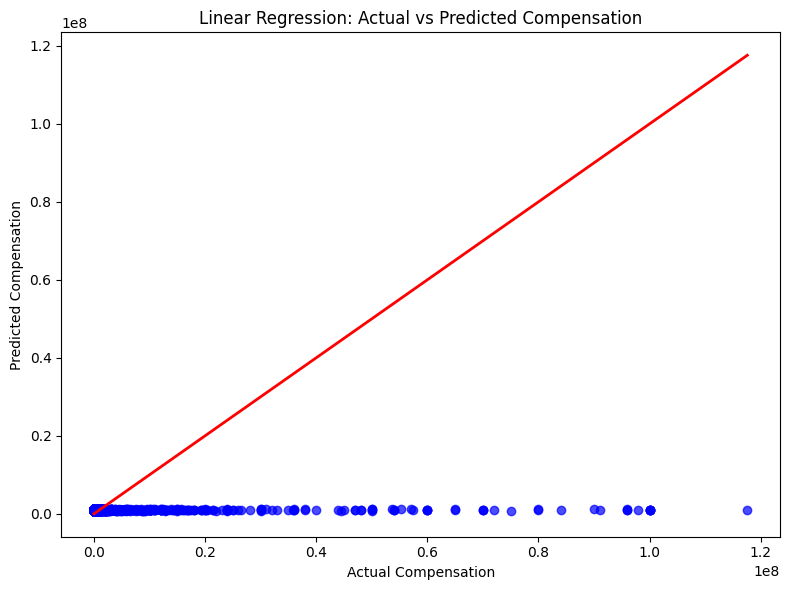

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import re

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/survey_results_public.csv')

# Select relevant columns
selected_columns = ['Age', 'Employment', 'RemoteWork', 'Country', 'EdLevel',
                    'CompTotal', 'AISelect', 'YearsCodePro', 'Industry']
df_selected = df[selected_columns].copy()

# Drop rows with missing 'CompTotal' (target variable)
df_selected.dropna(subset=['CompTotal'], inplace=True)

# Remove outliers in 'CompTotal'
upper_limit = df_selected['CompTotal'].quantile(0.99)
df_selected = df_selected[df_selected['CompTotal'] <= upper_limit]

# Handle 'Age' column (convert and impute missing values)
def convert_age(value):
    if isinstance(value, str):
        if 'Under 18' in value:
            return 17  # Assuming the maximum of 'Under 18' is 17
        elif '65 or older' in value:
            return 65  # Assuming a minimum age of 65 for this category
        elif '-' in value:
            # Extract numeric parts using a regular expression
            age_range = list(map(int, re.findall(r'\d+', value)))
            return sum(age_range) / len(age_range)  # Average of the range
        else:
            # Try extracting a single numeric value
            try:
                return int(re.search(r'\d+', value).group())
            except (AttributeError, TypeError):  # Handle cases where no number is found
                return None
    return pd.to_numeric(value, errors='coerce')

df_selected['Age'] = df_selected['Age'].apply(convert_age)
df_selected['Age'].fillna(df_selected['Age'].median(), inplace=True)  # Replace NaN with median

# Clean and convert 'YearsCodePro'
def clean_years_code_pro(value):
    if isinstance(value, str):
        if value == 'Less than 1 year':
            return 0
        elif value == 'More than 50 years':
            return 51
    try:
        return float(value)
    except ValueError:
        return None

df_selected['YearsCodePro'] = df_selected['YearsCodePro'].apply(clean_years_code_pro)
df_selected['YearsCodePro'].fillna(df_selected['YearsCodePro'].median(), inplace=True)

# Encode categorical features
categorical_cols = ['Employment', 'RemoteWork', 'Country', 'EdLevel', 'AISelect', 'Industry']
df_selected[categorical_cols] = df_selected[categorical_cols].fillna('Unknown')  # Fill missing values with 'Unknown'
for col in categorical_cols:
    le = LabelEncoder()
    df_selected[col] = le.fit_transform(df_selected[col].astype(str))

# Verify all missing values are handled
print("Missing values per column after cleaning:")
print(df_selected.isnull().sum())

# Scale numeric columns
numerical_cols = ['Age', 'YearsCodePro']
scaler = StandardScaler()
df_selected[numerical_cols] = scaler.fit_transform(df_selected[numerical_cols])

# Final check for missing values
print("Missing values per column after scaling:")
print(df_selected.isnull().sum())

# Now continue with your linear regression model:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Use only 'Age' as the feature for prediction
X = df_selected[['Age']]  # Feature
y = df_selected['CompTotal']  # Target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
y_pred_train = lr_model.predict(X_train)
y_pred_test = lr_model.predict(X_test)

# Evaluate the model
mae_train = mean_absolute_error(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

# Print evaluation metrics
print("Linear Regression Model Evaluation:")
print(f"Train MAE: {mae_train:.2f}")
print(f"Train MSE: {mse_train:.2f}")
print(f"Train R2: {r2_train:.2f}")
print(f"Test MAE: {mae_test:.2f}")
print(f"Test MSE: {mse_test:.2f}")
print(f"Test R2: {r2_test:.2f}")

# Plot the predictions vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.title('Linear Regression: Actual vs Predicted Compensation')
plt.xlabel('Actual Compensation')
plt.ylabel('Predicted Compensation')
plt.tight_layout()
plt.show()

Mean Absolute Error (MAE): 927949.816947986
Mean Squared Error (MSE): 23096373638105.145
R-squared: 0.45354545257624124


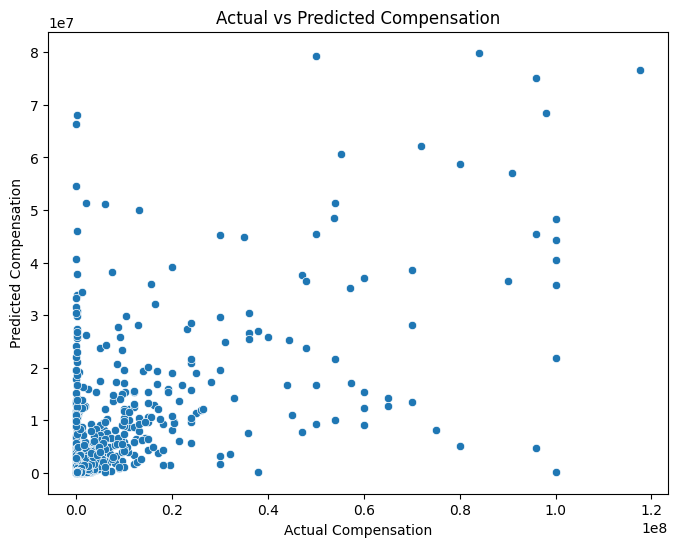

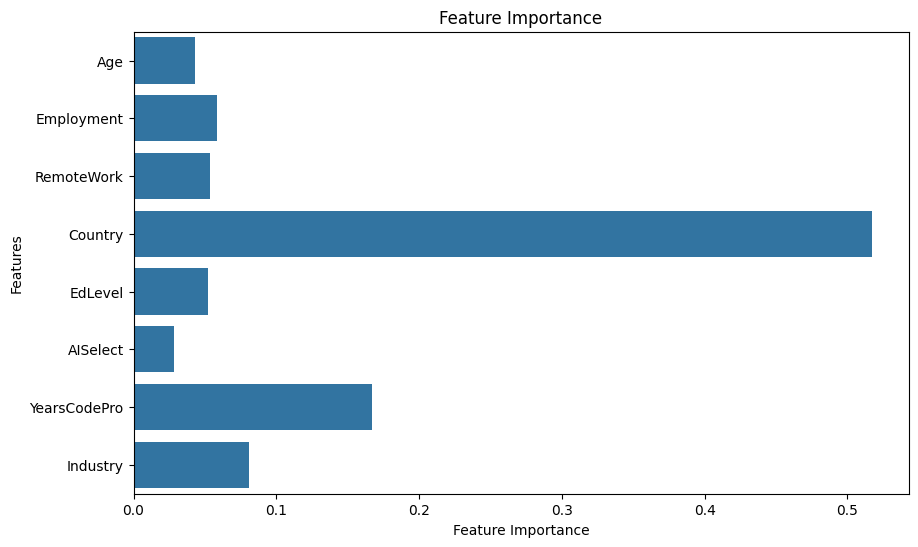

Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/survey_results_public.csv')

# Select relevant columns
selected_columns = ['Age', 'Employment', 'RemoteWork', 'Country', 'EdLevel',
                    'CompTotal', 'AISelect', 'YearsCodePro', 'Industry']
df_selected = df[selected_columns].copy()

# Drop rows with missing 'CompTotal' (target variable)
df_selected.dropna(subset=['CompTotal'], inplace=True)

# Remove outliers in 'CompTotal'
upper_limit = df_selected['CompTotal'].quantile(0.99)
df_selected = df_selected[df_selected['CompTotal'] <= upper_limit]

# Handle 'Age' column (convert and impute missing values)
def convert_age(value):
    if isinstance(value, str):
        if 'Under 18' in value:
            return 17
        elif '65 or older' in value:
            return 65
        elif '-' in value:
            age_range = list(map(int, re.findall(r'\d+', value)))
            return sum(age_range) / len(age_range)
        else:
            try:
                return int(re.search(r'\d+', value).group())
            except (AttributeError, TypeError):
                return None
    return pd.to_numeric(value, errors='coerce')

df_selected['Age'] = df_selected['Age'].apply(convert_age)
df_selected['Age'] = df_selected['Age'].fillna(df_selected['Age'].median())  # Corrected

# Clean and convert 'YearsCodePro'
def clean_years_code_pro(value):
    if isinstance(value, str):
        if value == 'Less than 1 year':
            return 0
        elif value == 'More than 50 years':
            return 51
    try:
        return float(value)
    except ValueError:
        return None

df_selected['YearsCodePro'] = df_selected['YearsCodePro'].apply(clean_years_code_pro)
df_selected['YearsCodePro'] = df_selected['YearsCodePro'].fillna(df_selected['YearsCodePro'].median())  # Corrected

# Encode categorical features
categorical_cols = ['Employment', 'RemoteWork', 'Country', 'EdLevel', 'AISelect', 'Industry']
df_selected[categorical_cols] = df_selected[categorical_cols].fillna('Unknown')
for col in categorical_cols:
    le = LabelEncoder()
    df_selected[col] = le.fit_transform(df_selected[col].astype(str))

# Scale numeric columns
numerical_cols = ['Age', 'YearsCodePro']
scaler = StandardScaler()
df_selected[numerical_cols] = scaler.fit_transform(df_selected[numerical_cols])

# Split data into features and target
X = df_selected.drop('CompTotal', axis=1)
y = df_selected['CompTotal']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared: {r2}")

# Plot actual vs predicted compensation
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.title('Actual vs Predicted Compensation')
plt.xlabel('Actual Compensation')
plt.ylabel('Predicted Compensation')
plt.show()

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=model.feature_importances_, y=X.columns)
plt.title('Feature Importance')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()

from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

# Set up Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

# Define hyperparameters to tune
param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Use RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist,
                                   n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

# Best model from RandomizedSearchCV
best_rf_model = random_search.best_estimator_

# Predict with the best model
y_pred_best = best_rf_model.predict(X_test)

# Evaluate the best model
mae_best = mean_absolute_error(y_test, y_pred_best)
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print(f"Optimized Model - Mean Absolute Error (MAE): {mae_best}")
print(f"Optimized Model - Mean Squared Error (MSE): {mse_best}")
print(f"Optimized Model - R-squared: {r2_best}")
